In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [2]:
truth = './data/processed/truth.txt'
pred = './data/processed/predictions.txt'

df_truth = pd.read_csv(truth, header=None, names=['class'])
df_pred = pd.read_csv(pred, header=None, names=['class'])

In [3]:
df_truth, df_pred

(   class
 0   Jedi
 1   Jedi
 2   Sith
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Sith
 97  Sith
 98  Jedi
 99  Sith
 
 [100 rows x 1 columns],
    class
 0   Sith
 1   Sith
 2   Jedi
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Jedi
 97  Jedi
 98  Sith
 99  Jedi
 
 [100 rows x 1 columns])

In [4]:
df_pred_2 = df_pred.copy()


In [5]:
def generate_confusion_matrix(truth, pred, true_label, negative_label):
    confusion_matrix = np.array([
        [0, 0],
        [0, 0]
    ])

    for i in range(len(truth)):
        if truth['class'][i] == true_label and pred['class'][i] == true_label: # TP
            confusion_matrix[0][0] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == negative_label: # TN
            confusion_matrix[1][1] += 1
        elif truth['class'][i] == true_label and pred['class'][i] == negative_label: # FP
            confusion_matrix[0][1] += 1
        elif truth['class'][i] == negative_label and pred['class'][i] == true_label: # FN
            confusion_matrix[1][0] += 1

    return confusion_matrix

def generate_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    TN = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    precision = float(f'{TP / (TP + FP):.2f}')
    recall = float(f'{TP / (TP + FN):.2f}')
    f1_score = float(f'{2 * (precision * recall) / (precision + recall):.2f}')
    accuracy = float(f'{(TP + TN) / (TP + TN + FP + FN):.2f}')

    return precision, recall, f1_score, accuracy



In [6]:
j_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Jedi', 'Sith')
s_confusion_matrix = generate_confusion_matrix(df_pred, df_truth, 'Sith', 'Jedi')

j_precision, j_recall, j_f1_score, j_accuracy = generate_metrics(j_confusion_matrix)
s_precision, s_recall, s_f1_score, s_accuracy = generate_metrics(s_confusion_matrix)

j_total = len(df_truth[df_truth['class'] == 'Jedi'])
s_total = len(df_truth[df_truth['class'] == 'Sith'])

In [7]:
df_metrics = pd.DataFrame({
    'precision': [j_precision, s_precision],
    'recall': [j_recall, s_recall],
    'f1_score': [j_f1_score, s_f1_score],
    'total': [j_total, s_total],
}, index=['Jedi', 'Sith'])

df_metrics.loc['Accuracy'] = ['', '', j_accuracy, j_total + s_total]
print(df_metrics)

confusion_matrix = generate_confusion_matrix(df_truth, df_pred, 'Jedi', 'Sith')
print(confusion_matrix)

# [[25 24]
# [30 21]]

         precision recall  f1_score  total
Jedi          0.45   0.51      0.48     49
Sith          0.47   0.41      0.44     51
Accuracy                       0.46    100
[[25 24]
 [30 21]]


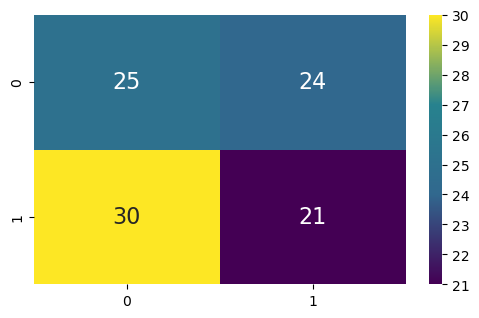

In [8]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ['#440054', '#31688E', '#27828E', '#FDE724'])

plt.figure(figsize=(6, 3.5))
sns.heatmap(confusion_matrix, annot=True, annot_kws={
  'size': 16
}, cmap=custom_cmap)
plt.show()

### Ex01

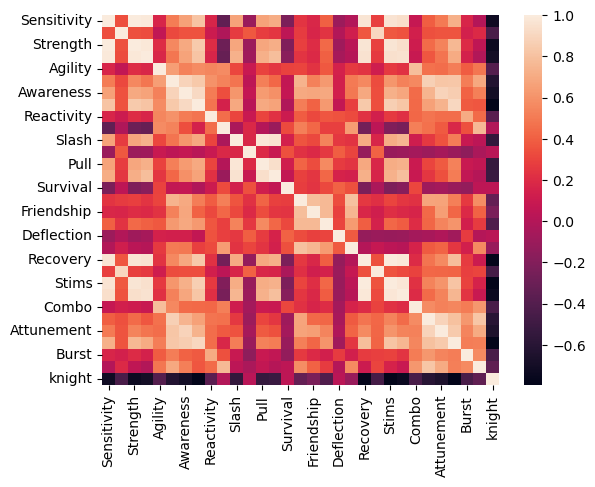

In [9]:
train_knight = pd.read_csv('./knights/Train_knight.csv')
train_knight_copy = train_knight.copy()
train_knight_copy['knight'] = train_knight_copy['knight'].astype('category').cat.codes
correlation_matrix = train_knight_copy.corr()

sns.heatmap(correlation_matrix)
plt.show()

### Ex02

In [10]:
variance_by_skill = train_knight_copy.var()
variance_by_skill = variance_by_skill.to_numpy().astype(np.float64)
np.set_printoptions(suppress=False)

print('Variances (Percentage):')
print(variance_by_skill)

Variances (Percentage):
[1.17133353e+01 1.72649147e+01 5.55161298e+02 1.14926555e+05
 1.85108037e-04 2.60317720e-03 6.24517014e-03 1.41907991e-03
 7.03730788e-04 4.40018273e-05 8.20917251e-02 3.03136371e-01
 4.40553500e+00 2.26672983e+03 8.53617854e-06 2.77187308e-04
 1.01460534e-03 3.84451952e-05 5.44314206e-05 6.51749514e-06
 2.16539762e+01 3.58423956e+01 1.05096122e+03 2.88813118e+05
 5.23913600e-04 2.56868490e-02 4.64224725e-02 4.27753237e-03
 3.33740251e-03 3.41061861e-04 2.36649241e-01]


In [11]:
variance_by_skill = train_knight_copy.var()
cumulative_variance = (variance_by_skill.cumsum() / variance_by_skill.sum()) * 100
cumulative_variance = cumulative_variance.to_numpy().astype(np.float64)

np.set_printoptions(suppress=True)

print('Cumulative Variances (Percentage):')
print(cumulative_variance)

Cumulative Variances (Percentage):
[  0.002873     0.00710767   0.14327536  28.33199096  28.33199101
  28.33199165  28.33199318  28.33199353  28.3319937   28.33199371
  28.33201385  28.3320882   28.33316877  28.889143    28.889143
  28.88914307  28.88914331  28.88914332  28.88914334  28.88914334
  28.89445454  28.90324581  29.16102129  99.99992219  99.99992232
  99.99992862  99.99994     99.99994105  99.99994187  99.99994196
 100.        ]


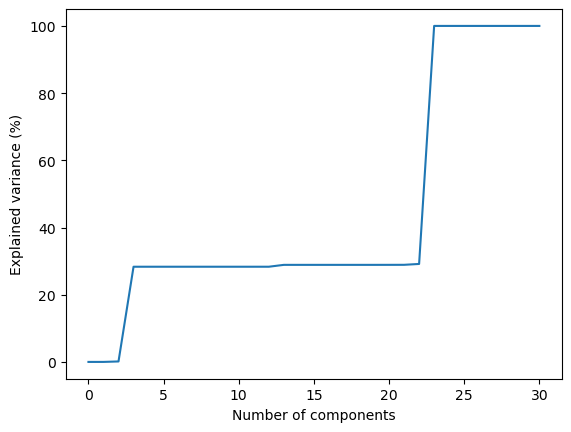

In [22]:
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance (%)')
plt.show()